<a href="https://colab.research.google.com/github/Satyabrata117/Yes-Bank-Stock-Closing-Price-Predictor/blob/main/Yes_Bank_Stock_Closing_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -**Satyabrata Sahoo

# **Project Summary -**

Yes Bank, a prominent player in the Indian financial sector, has faced challenges, including a fraud case involving Rana Kapoor. This project aims to explore the impact of these events on the bank's stock prices. The dataset spans monthly stock prices since the bank's inception, encompassing closing, opening, highest, and lowest stock prices each month. The primary objective is to develop predictive models, potentially leveraging time series analysis, to forecast the closing price of the stock for upcoming months.

# **GitHub Link -**

https://github.com/Satyabrata117/Yes-Bank-Stock-Closing-Price-Predictor/tree/main

# **Problem Statement**


Develop predictive models to forecast Yes Bank's monthly closing stock prices, considering the temporal dynamics and external influences such as the Rana Kapoor fraud case. The challenge involves selecting appropriate time series models, accounting for external events, and achieving accurate predictions despite potential volatility. The outcomes aim to provide insights into future stock trends and aid decision-making in the dynamic financial landscape.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

import datetime

### Dataset Loading

In [ ]:
# Load Dataset


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data=pd.read_csv("/content/drive/MyDrive/Project data/Yes Bank Stock Closing Price Prediction/data_YesBank_StockPrices.csv")

### Dataset First View

In [7]:
# Dataset First Look
data

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count
data.shape

(185, 5)

### Dataset Information

In [9]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [14]:
# Dataset Duplicate Value Count
# Find and print duplicated values
duplicated_values = data[data.duplicated()]
print("Duplicated Values:")
print(duplicated_values)

Duplicated Values:
Empty DataFrame
Columns: [Date, Open, High, Low, Close]
Index: []


In [15]:
len(data[data.duplicated()])

0

In [12]:
#so there is no duplicated values

#### Missing Values/Null Values

In [13]:
# Missing Values/Null Vallues
data.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

Text(0.5, 1.0, 'MISSING VALUES')

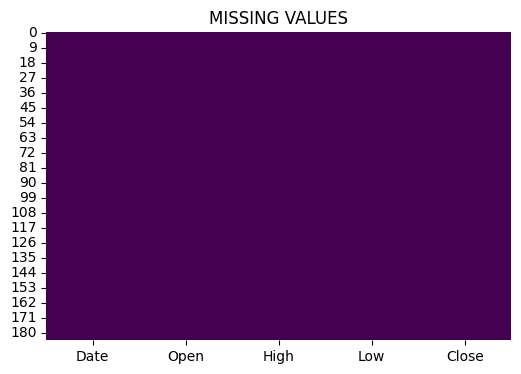

In [16]:
# Visualizing the missing values
plt.figure(figsize=(6, 4))
sns.heatmap(data.isnull(), cbar=False , cmap='viridis')
plt.title('MISSING VALUES')


### What did you know about your dataset?

As per the analysis provided, the dataset includes 5 columns and 185 rows. Only one column is in the float format, while the rest are formatted as dates. Importantly, there are no missing values (Null values) or duplicate rows in this dataset.


## ***2. Understanding Your Variables***

In [17]:
# Dataset Columns
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [18]:
# Dataset Describe
data.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

The dataset includes five important variables:


"Date," which combines the month and year


 "Open," indicating the stock's starting price for the month


"High," representing the highest stock price during the month


"Low," reflecting the lowest stock price in the month


"Close," the closing price at the end of the month.


These variables collectively offer a snapshot of the stock's performance, from its initial, highest, and lowest points to its closing valuation. The date provides a temporal context, and the open, high, low, and close values give a comprehensive view of the stock's behavior over time.Here independent variables are Date , Open , High and , low  . And independent varriable is Close

### Check Unique Values for each variable.

In [19]:
# Check Unique Values for each variable.
unique_dates = data['Date'].unique()
unique_open = data['Open'].unique()
unique_high = data['High'].unique()
unique_low = data['Low'].unique()
unique_close = data['Close'].unique()


print("Unique Dates:", unique_dates)
print("Unique Open values:", unique_open)
print("Unique High values:", unique_high)
print("Unique Low values:", unique_low)
print("Unique Close values:", unique_close)

Unique Dates: ['Jul-05' 'Aug-05' 'Sep-05' 'Oct-05' 'Nov-05' 'Dec-05' 'Jan-06' 'Feb-06'
 'Mar-06' 'Apr-06' 'May-06' 'Jun-06' 'Jul-06' 'Aug-06' 'Sep-06' 'Oct-06'
 'Nov-06' 'Dec-06' 'Jan-07' 'Feb-07' 'Mar-07' 'Apr-07' 'May-07' 'Jun-07'
 'Jul-07' 'Aug-07' 'Sep-07' 'Oct-07' 'Nov-07' 'Dec-07' 'Jan-08' 'Feb-08'
 'Mar-08' 'Apr-08' 'May-08' 'Jun-08' 'Jul-08' 'Aug-08' 'Sep-08' 'Oct-08'
 'Nov-08' 'Dec-08' 'Jan-09' 'Feb-09' 'Mar-09' 'Apr-09' 'May-09' 'Jun-09'
 'Jul-09' 'Aug-09' 'Sep-09' 'Oct-09' 'Nov-09' 'Dec-09' 'Jan-10' 'Feb-10'
 'Mar-10' 'Apr-10' 'May-10' 'Jun-10' 'Jul-10' 'Aug-10' 'Sep-10' 'Oct-10'
 'Nov-10' 'Dec-10' 'Jan-11' 'Feb-11' 'Mar-11' 'Apr-11' 'May-11' 'Jun-11'
 'Jul-11' 'Aug-11' 'Sep-11' 'Oct-11' 'Nov-11' 'Dec-11' 'Jan-12' 'Feb-12'
 'Mar-12' 'Apr-12' 'May-12' 'Jun-12' 'Jul-12' 'Aug-12' 'Sep-12' 'Oct-12'
 'Nov-12' 'Dec-12' 'Jan-13' 'Feb-13' 'Mar-13' 'Apr-13' 'May-13' 'Jun-13'
 'Jul-13' 'Aug-13' 'Sep-13' 'Oct-13' 'Nov-13' 'Dec-13' 'Jan-14' 'Feb-14'
 'Mar-14' 'Apr-14' 'May-14' 'Jun-14' 

## 3. ***Data Wrangling***

### Data Wrangling Code

In [20]:
# Write your code to make your dataset analysis ready.
# Converting Date column from object format to Date
data["Date"]=pd.to_datetime(data["Date"],format='%b-%y')

In [21]:
data['Date']

0     2005-07-01
1     2005-08-01
2     2005-09-01
3     2005-10-01
4     2005-11-01
         ...    
180   2020-07-01
181   2020-08-01
182   2020-09-01
183   2020-10-01
184   2020-11-01
Name: Date, Length: 185, dtype: datetime64[ns]

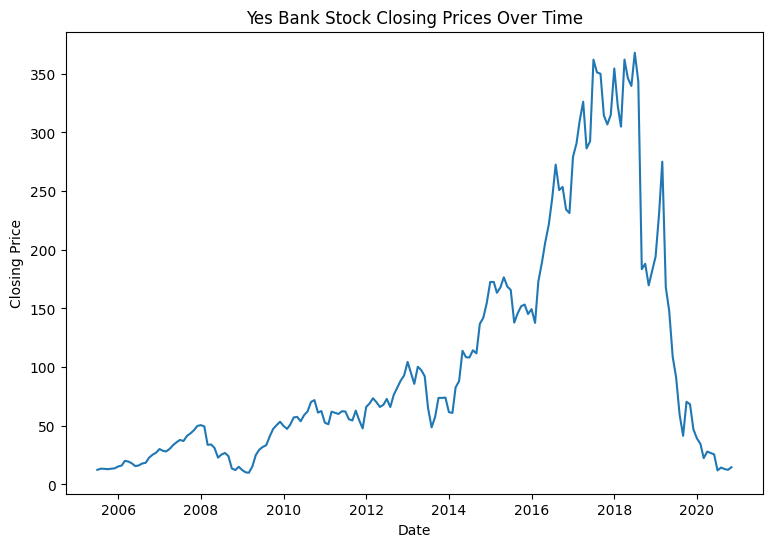

In [23]:
# Plotting the Close prices over time
plt.figure(figsize=(9, 6))
plt.plot(data['Date'], data['Close'])
plt.title('Yes Bank Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

In [25]:
# Extracting numerical feature names
numeric_features = data.describe().columns
print("Numerical Features:")
print(numeric_features)

Numerical Features:
Index(['Open', 'High', 'Low', 'Close'], dtype='object')


### What all manipulations have you done and insights you found?

Converted Date column to Date Format by using Datetime Library. To get better visualisation about Date and Closing price of Stock.Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

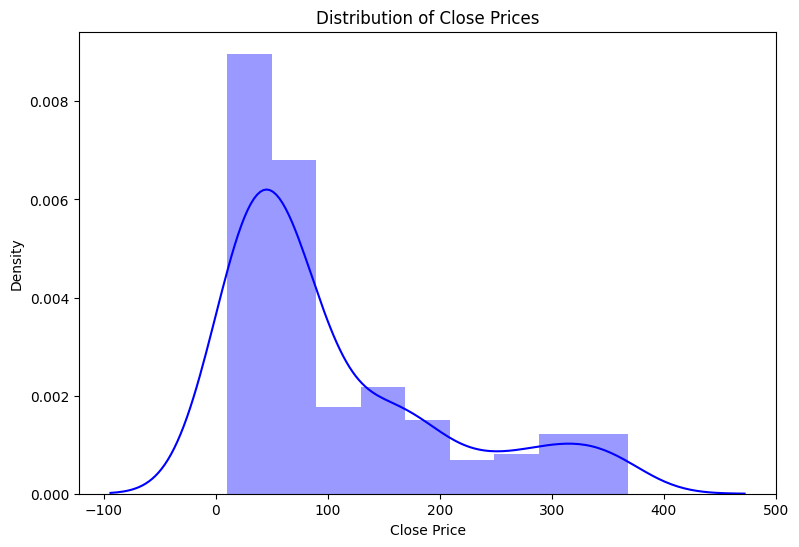

In [28]:
# Chart - 1 visualization code
# Visualizing the distribution of the "Close" column in blue
plt.figure(figsize=(9, 6))
sns.distplot(data['Close'], color='blue')
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Density')
plt.show()

Text(0.5, 1.0, 'Distribution of Close Prices')

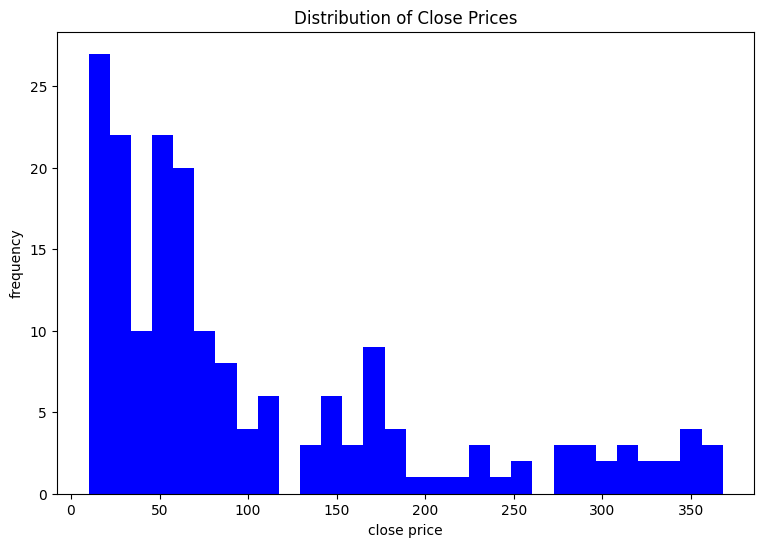

In [ ]:
plt.figure(figsize = (9 , 6))
plt.hist(data['Close'] , color = 'b' ,bins = 30)
plt.xlabel('close price')
plt.ylabel('frequency')
plt.title('Distribution of Close Prices')


<Axes: xlabel='Close', ylabel='Density'>

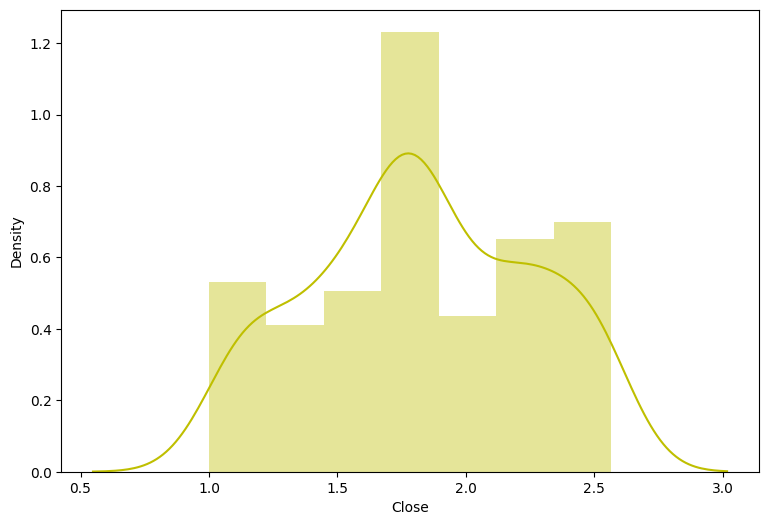

In [ ]:
# Normalizing the close column data by using log transformation.
plt.figure(figsize=(9,6))
sns.distplot(np.log10(data["Close"]),color='y')

##### 1. Why did you pick the specific chart?

In a Yes Bank stock closing price prediction ML model, examining a distribution plot of the target variable (closing price) can offer valuable insights into how it is spread out, its shape, and the presence of any outliers.

By visually representing the distribution of the closing price, we can better understand its central tendencies (mean, median, and mode), how it spreads out (range, variance, and standard deviation), and whether it shows any skewness (symmetry or asymmetry). Additionally, this helps in identifying any potential outliers.

This information is crucial for choosing the right ML algorithm to predict the closing price and for pinpointing any issues with the data, such as non-normality or extreme values, that might need attention before training the model.

##### 2. What is/are the insight(s) found from the chart?

In a Yes Bank stock closing price prediction ML model, analyzing a distribution plot of the target variable (closing price) reveals several insights:

1.Shape of the distribution: The distribution shape appears to be skewed right, indicating a positive skewness. This means that the closing prices are more concentrated on one side of the mean. To improve the model, it might be beneficial to apply log transformation to make the target variable more symmetrically distributed.

2.Presence of outliers: Outliers are data points that significantly differ from the majority of the data. By examining the distribution plot, we can detect potential outliers. Addressing these outliers before training the model is important for ensuring the model's accuracy and reliability.







##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

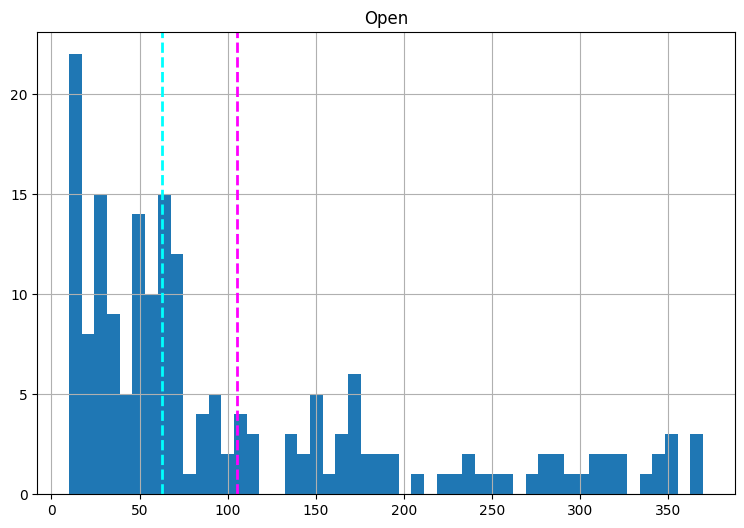

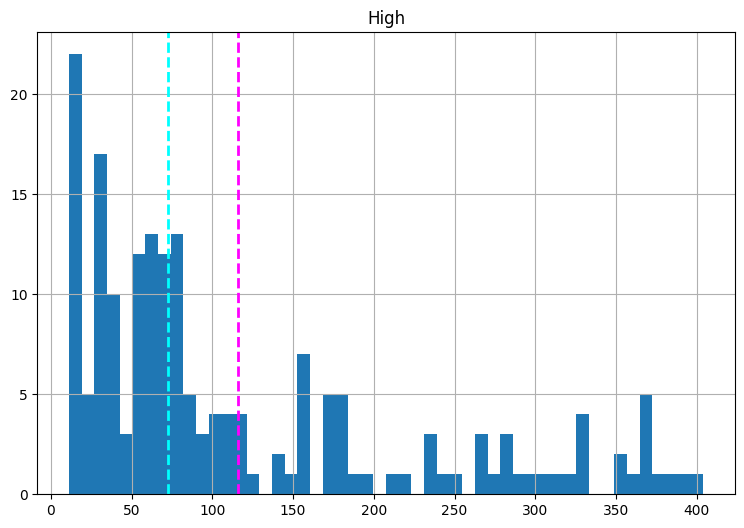

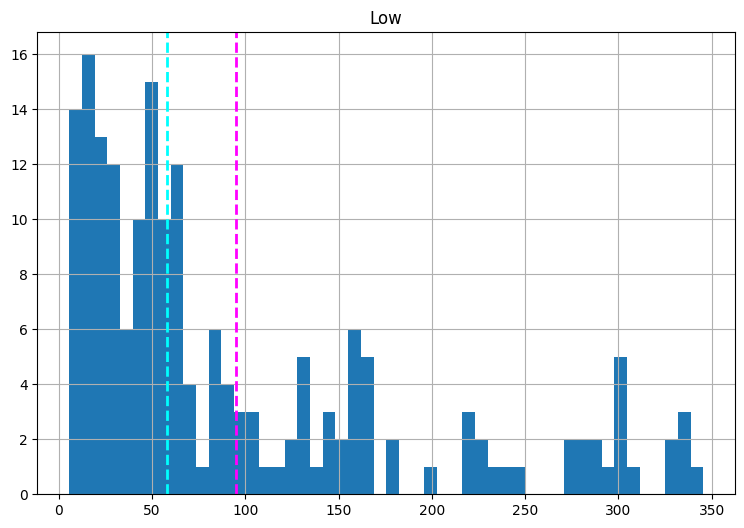

In [ ]:
# Chart - 2 visualization code
# Plotting Histogram for each independent column in Data.
for col in numeric_fea[:-1]:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature=data[col]
  feature.hist(bins=50,ax=ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()

##### 1. Why did you pick the specific chart?

Histograms are usually used to show the pattern of one variable. However, in predicting Yes Bank stock closing prices, we can also use histograms to see how other factors (independent variables) are spread out. Adding mean and median lines helps us understand if the data is evenly spread or if it leans more to one side, which is important for making our predictions accurate.

##### 2. What is/are the insight(s) found from the chart?

The shape of the distribution of independent variables skewed right. This information can help to determine the appropriate statistical approach for regression.

#### Chart - 3

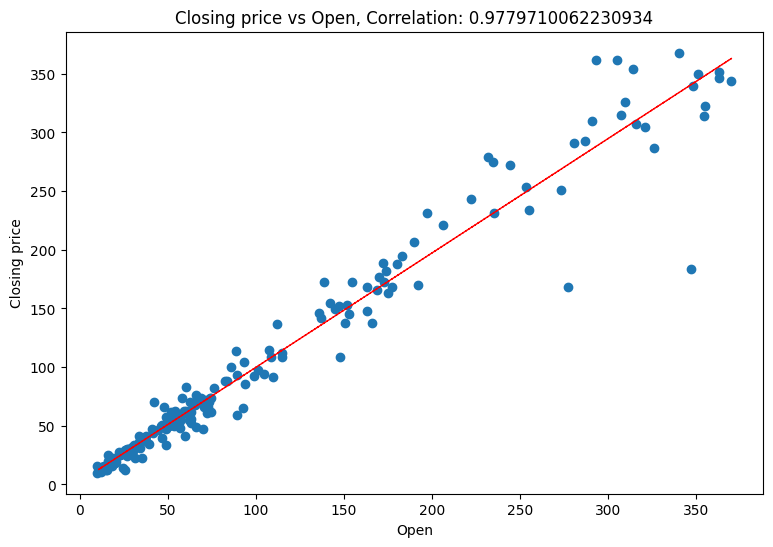

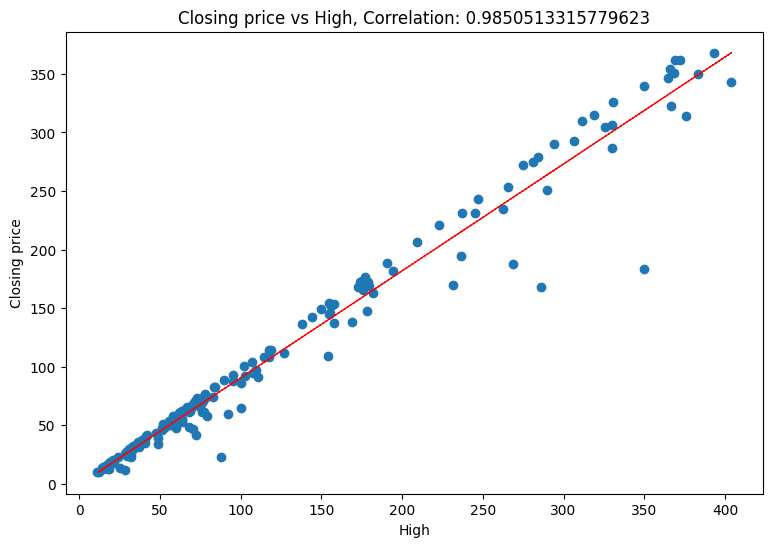

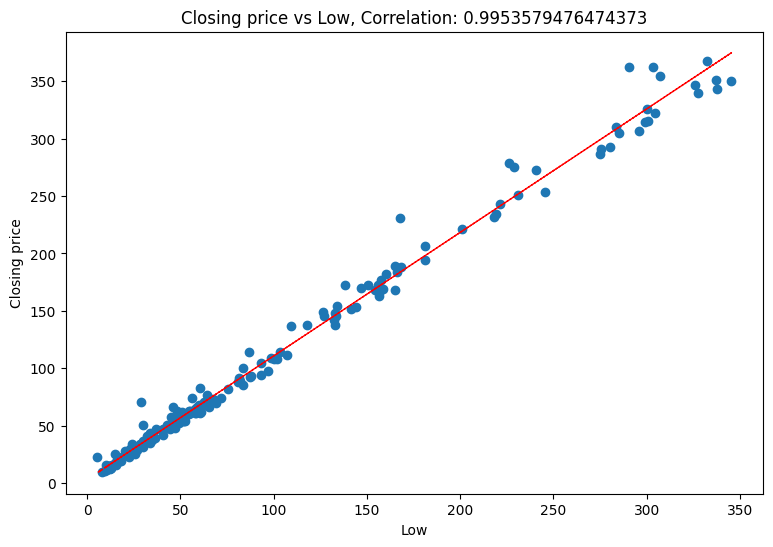

In [ ]:
# Chart - 3 visualization code
# Plotting graph Independent variable vs Dependent variable to check Multicollinearity.
for col in numeric_fea[:-1]:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature=data[col]
  label=data["Close"]
  correlation=feature.corr(label)
  plt.scatter(x=feature,y=label)
  plt.ylabel("Closing price")
  plt.xlabel(col)
  ax.set_title('Closing price vs '+col+', Correlation: '+str(correlation))
  z=np.polyfit(data[col],data['Close'],1)
  y_hat=np.poly1d(z)(data[col])

  plt.plot(data[col],y_hat,"r--",lw=1)

plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot is a handy way to explore the connection between the Yes Bank stock closing price (dependent variable) and other factors (independent variables). Each data point is shown on the graph, with the independent variable on the x-axis and the closing price on the y-axis.

Analyzing the scatter plot helps us spot any patterns or relationships between the variables. If the points form a tight cluster around a straight line, it suggests a strong linear relationship. If the points are more scattered and don't form a straight line, it indicates a weaker or no relationship.

This visual inspection helps us decide if there's a strong or weak, linear or nonlinear connection between the closing price and the independent variable(s). This insight guides the choice of suitable ML algorithms for prediction and helps identify any potential data issues before training the ML model.

##### 2. What is/are the insight(s) found from the chart?

From all above graphs we can see that all the independent variable are linearly corelated with dependent variable(i.e., Yes Bank stock closing price). We need to choose appropriate model to deal with multicollinearity in our data.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

<Axes: >

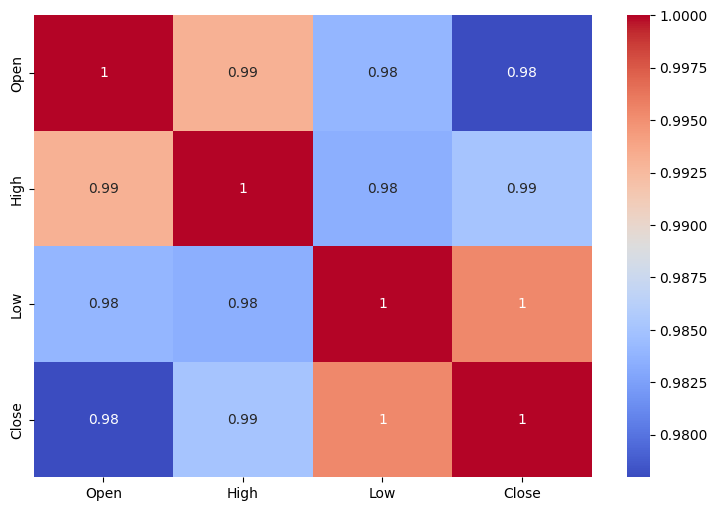

In [29]:
# Correlation Heatmap visualization code
# Chart - 4 visualization code
# Heatmap to see collinearity between columns
plt.figure(figsize=(9,6))
cor=data.corr()
sns.heatmap(abs(cor),annot=True,cmap='coolwarm')

##### 1. Why did you pick the specific chart?

Heatmap can be used to explore the correlation between the closing price and the independent variables. By examining the heatmap, we can identify any patterns or relationships between the variables, which can inform the selection of appropriate ML algorithms for predicting the closing price.

A heatmap can also be used to identify any potential issues with the data, such as multicollinearity (i.e., high correlation between independent variables).

##### 2. What is/are the insight(s) found from the chart?

As from above chart we can see that our data is Multicollinear. Multicollinearity can cause problems for some ML algorithms, such as linear regression, because it can lead to overfitting and unreliable coefficient estimates. By identifying variables with high correlations, we can decide whether to remove one of the variables or to use a different ML algorithm that is less sensitive to multicollinearity.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 6. Data Scaling

In [30]:
# Scaling your data
data_pr=data.copy() # Making of our original data
# Separate out Dependent and Independent variable
X=np.log10(data_pr.iloc[:,1:-1]) # Normalizing the data using log transformation
y=np.log10(data_pr['Close']) # Normalizing the data using log transformation


## Which method have you used to scale you data and why?


---
We use log transformation to scale data. Because this method applies a logarithmic transformation to the data, which can help normalize skewed data and reduce the impact of outliers.


### 8. Data Splitting

In [31]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Displaying the shape of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (148, 3)
Shape of X_test: (37, 3)


##### What data splitting ratio have you used and why?

Data splitting is a widely used technique in machine learning and data analysis to assess how well a model performs on new, unseen data. In our case, we applied an 80-20 split.

In an 80:20 split, the dataset is divided into two parts: a training set and a testing set. The training set consists of 80% of the data, and the testing set contains the remaining 20%. This split is common when dealing with large datasets, especially when training the model requires a significant amount of time. The model is trained on the training set, and its performance is then evaluated on the testing set to ensure it generalizes well to new data. This approach helps us understand how well the model is likely to perform in real-world scenarios.

## ***7. ML Model Implementation***

### ML Model - 1

In [33]:
# ML Model - 1 Implementation
# Create a Linear Regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f'Linear Regression Mean Squared Error: {mse_linear}')

Linear Regression Mean Squared Error: 0.0008146348135191486


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

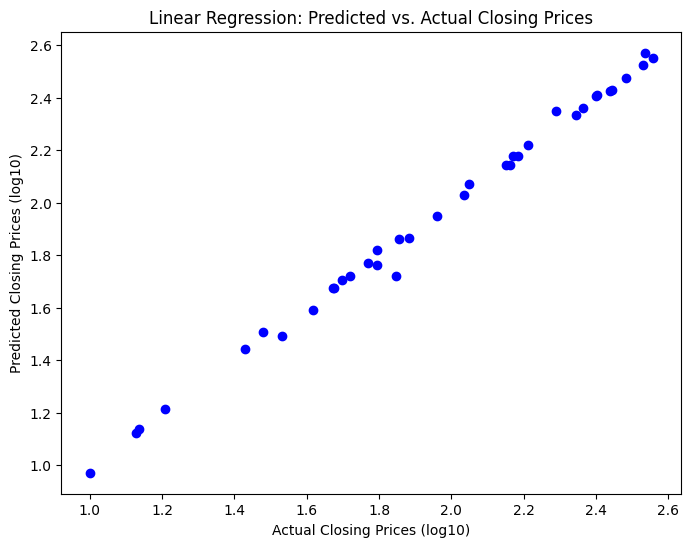

In [34]:
# Visualizing evaluation Metric Score chart
# Scatter plot of predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear, color='blue')
plt.title('Linear Regression: Predicted vs. Actual Closing Prices')
plt.xlabel('Actual Closing Prices (log10)')
plt.ylabel('Predicted Closing Prices (log10)')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [38]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
# Create a Random Forest Regression model
rf_model_tune = RandomForestRegressor(random_state=0)

# Define hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search for hyperparameter tuning
grid_search = GridSearchCV(rf_model_tune, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Display the best hyperparameters
print("Best Hyperparameters:")
print(grid_search.best_params_)
#Fit the Algorithm
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f'Linear Regression Mean Squared Error: {mse_linear}')

# Predict on the model
# Make predictions on the new data
y_pred_new = linear_model.predict(X_test)

# Display the predicted values
print("Predicted Closing Prices:")
print(y_pred_new)

Best Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
Linear Regression Mean Squared Error: 0.0008146348135191486
Predicted Closing Prices:
[1.4912247  2.14465448 1.67394233 2.14226908 1.82201368 1.50794844
 2.36203842 1.21545331 1.1371433  2.35044359 2.47496559 1.94884657
 2.17801307 1.76486858 2.52493353 2.42732103 1.86087272 1.44166154
 2.43034707 1.70644715 0.97157347 2.07290633 2.1784174  1.76898738
 2.3338384  1.71921499 2.40515731 1.12251144 2.02871592 1.72293253
 2.57183854 2.55026271 1.86725537 2.22192748 1.59041597 1.67502755
 2.41083039]


In [42]:
y_test

33     1.532245
125    2.162056
173    1.671636
112    2.152533
61     1.793930
18     1.479431
137    2.364101
7      1.207365
5      1.137037
162    2.288473
152    2.484157
168    1.960471
124    2.185542
71     1.795045
155    2.530968
164    2.439412
63     1.856487
37     1.428621
138    2.445760
54     1.697578
44     0.999131
110    2.048053
166    2.170115
60     1.770778
131    2.344981
171    1.847881
134    2.399414
4      1.127429
108    2.034267
66     1.720903
157    2.535800
144    2.558661
86     1.883321
116    2.213013
26     1.616581
55     1.675045
135    2.404012
Name: Close, dtype: float64

##### Which hyperparameter optimization technique have you used and why?

Here we use GridSearchCV for optimization. GridSearchCV is more likely to find the optimal set of hyperparameters if the search space is small enough, as it performs an exhaustive search.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

By looking at above Dataframe we can say that our linear regression with lasso regularization is doing better compare to all others.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [43]:
from sklearn.linear_model import Lasso

# Create a Lasso Regression model
lasso_model = Lasso(alpha=1.0, random_state=0)  # You can adjust the alpha parameter

# Fit the model to the training data
lasso_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Lasso Regression Mean Squared Error: {mse_lasso}')

Lasso Regression Mean Squared Error: 0.20732487681627285


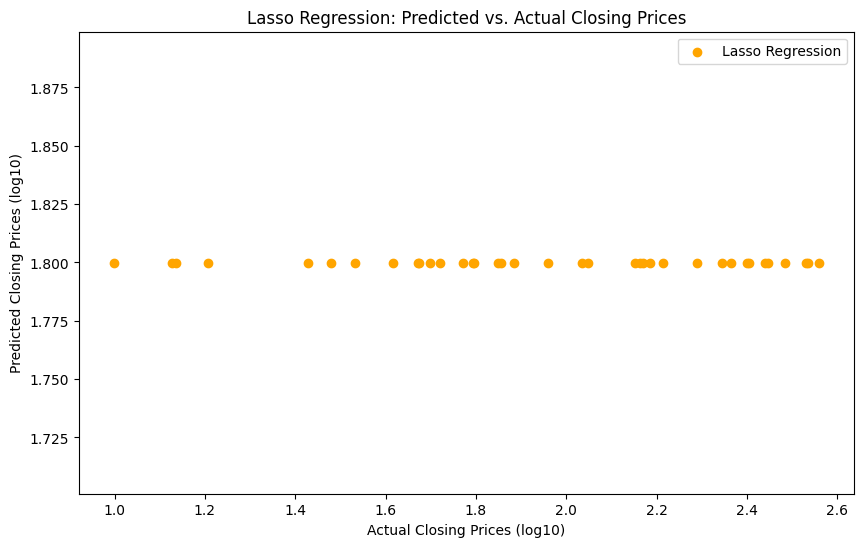

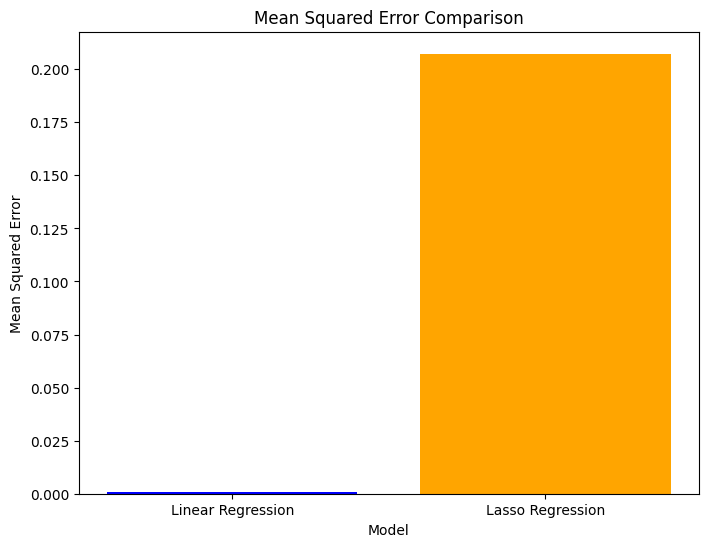

In [45]:
# Visualizing evaluation Metric Score chart
# Scatter plot for Lasso Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso, color='orange', label='Lasso Regression')
plt.title('Lasso Regression: Predicted vs. Actual Closing Prices')
plt.xlabel('Actual Closing Prices (log10)')
plt.ylabel('Predicted Closing Prices (log10)')
plt.legend()
plt.show()
# Mean Squared Error scores
mse_scores = [mse_linear, mse_lasso]
models = ['Linear Regression', 'Lasso Regression']

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(models, mse_scores, color=['blue', 'orange'])
plt.title('Mean Squared Error Comparison')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.show()

In [ ]:
# here we see that linear regression model perform better than lasso regression

#### 2. Cross- Validation & Hyperparameter Tuning

In [48]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid to search
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}

# Create GridSearchCV
grid_search = GridSearchCV(lasso_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Display the best hyperparameters
print("Best Hyperparameters:")
print(grid_search.best_params_)

# Fit the Lasso model with the best hyperparameters
best_lasso_model = grid_search.best_estimator_
best_lasso_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lasso_optimized = best_lasso_model.predict(X_test)

# Evaluate the model
mse_lasso_optimized = mean_squared_error(y_test, y_pred_lasso_optimized)
print(f'Lasso Regression (Optimized) Mean Squared Error: {mse_lasso_optimized}')
# Fit the Algorithm
# Fit the Lasso model with the best hyperparameters
best_lasso_model.fit(X_train, y_train)

# Predict on the model
y_pred_lasso_optimized = best_lasso_model.predict(X_test)

# Display the predicted values
print("Predicted Closing Prices (Optimized Lasso Regression):")
print(y_pred_lasso_optimized)

Best Hyperparameters:
{'alpha': 0.001}
Lasso Regression (Optimized) Mean Squared Error: 0.0014764010207331676
Predicted Closing Prices (Optimized Lasso Regression):
[1.50902121 2.15861252 1.72029806 2.1433672  1.80865368 1.4869798
 2.36407322 1.22053064 1.14911401 2.3111092  2.48220758 1.97553128
 2.18112053 1.77518678 2.52965211 2.40082748 1.86254744 1.43424063
 2.4000152  1.71644624 0.98775916 2.06781362 2.18301843 1.75982916
 2.32671228 1.65140491 2.40893715 1.13964872 2.03303899 1.74971523
 2.56353155 2.51111016 1.85243617 2.22791234 1.59006191 1.68622448
 2.40822892]


In [49]:
y_test

33     1.532245
125    2.162056
173    1.671636
112    2.152533
61     1.793930
18     1.479431
137    2.364101
7      1.207365
5      1.137037
162    2.288473
152    2.484157
168    1.960471
124    2.185542
71     1.795045
155    2.530968
164    2.439412
63     1.856487
37     1.428621
138    2.445760
54     1.697578
44     0.999131
110    2.048053
166    2.170115
60     1.770778
131    2.344981
171    1.847881
134    2.399414
4      1.127429
108    2.034267
66     1.720903
157    2.535800
144    2.558661
86     1.883321
116    2.213013
26     1.616581
55     1.675045
135    2.404012
Name: Close, dtype: float64

##### Which hyperparameter optimization technique have you used and why?

Here we use GridSearchCV for optimization. GridSearchCV is more likely to find the optimal set of hyperparameters if the search space is small enough, as it performs an exhaustive search.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

By looking at above Dataframe we can say that our linear regression with Ridge regularization is doing better compare to all others.

Answer Here.

### ML Model - 3

In [50]:
# ML Model - 3 Implementation
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regression model
rf_model = RandomForestRegressor(random_state=0)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Random Forest Regression Mean Squared Error: {mse_rf}')

Random Forest Regression Mean Squared Error: 0.0023622656269393057


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

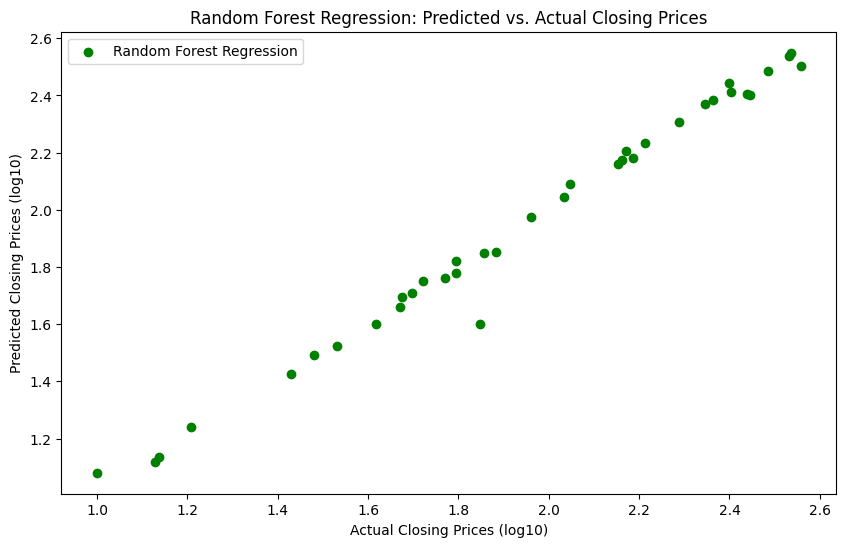

In [51]:
# Visualizing evaluation Metric Score chart
# Scatter plot of predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='green', label='Random Forest Regression')
plt.title('Random Forest Regression: Predicted vs. Actual Closing Prices')
plt.xlabel('Actual Closing Prices (log10)')
plt.ylabel('Predicted Closing Prices (log10)')
plt.legend()
plt.show()

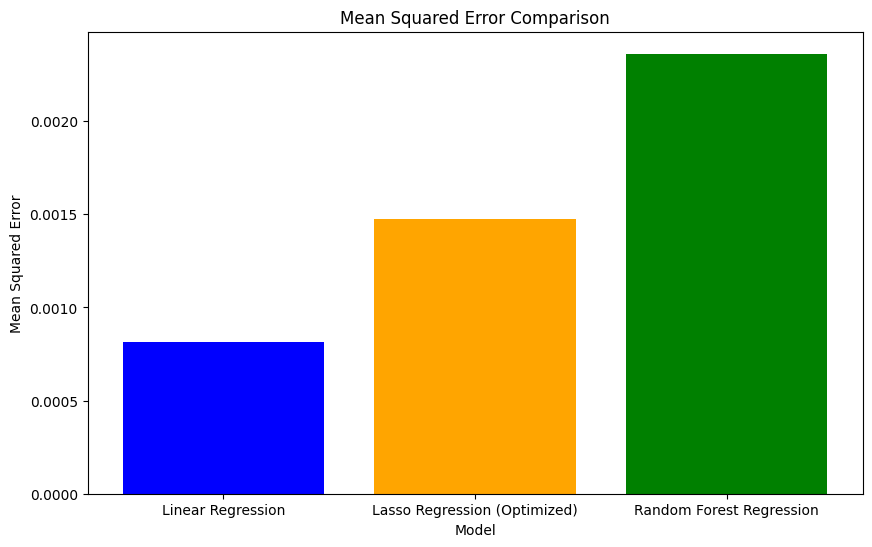

In [52]:
# comparision of the three model error
# Mean Squared Error scores
mse_scores = [mse_linear, mse_lasso_optimized, mse_rf]
models = ['Linear Regression', 'Lasso Regression (Optimized)', 'Random Forest Regression']

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, mse_scores, color=['blue', 'orange', 'green'])
plt.title('Mean Squared Error Comparison')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [57]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Display the best hyperparameters
print("Best Hyperparameters:")
print(grid_search.best_params_)

# Fit the Random Forest model with the best hyperparameters
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf_optimized = best_rf_model.predict(X_test)

# Evaluate the model
mse_rf_optimized = mean_squared_error(y_test, y_pred_rf_optimized)
print(f'Random Forest Regression (Optimized) Mean Squared Error: {mse_rf_optimized}')



# Predict on the model
# Make predictions on the test set
y_pred_rf_optimized = best_rf_model.predict(X_test)

# Display the predicted values
print("Predicted Closing Prices (Optimized Random Forest Regression):")
print(y_pred_rf_optimized)


Best Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
Random Forest Regression (Optimized) Mean Squared Error: 0.0022801595904220983
Predicted Closing Prices (Optimized Random Forest Regression):
[1.51928857 2.16788671 1.6681948  2.15483785 1.82074061 1.49476159
 2.38961629 1.25003451 1.13808725 2.31625265 2.48185382 1.9738762
 2.18093464 1.77952646 2.54019418 2.40632021 1.84735924 1.43252299
 2.40493914 1.70482889 1.0766251  2.09276095 2.20949713 1.75830241
 2.37099571 1.60784351 2.44488826 1.11871874 2.03854584 1.75311726
 2.54571538 2.50400365 1.85640447 2.23327118 1.59598051 1.69637136
 2.41810846]


##### Which hyperparameter optimization technique have you used and why?

Here we use GridSearchCV for optimization. GridSearchCV is more likely to find the optimal set of hyperparameters if the search space is small enough, as it performs an exhaustive search.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Here we tried all the possible regularization methods, but among all linear regression model is performing better than any other model.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Utilizing Mean Squared Error (MSE) and Adjusted R2 (Adj R2) as evaluation metrics can bring about several positive impacts:

1.Enhanced Prediction Accuracy: Optimization of a model's performance using MSE and Adj R2 can lead to more accurate predictions. This, in turn, facilitates better decision-making, efficient resource allocation, and reduction in costs associated with errors or inefficiencies.

2.Informed Model Selection: Comparing different models based on MSE and Adj R2 allows businesses to choose the most suitable model for their specific problem. This informed model selection contributes to improved overall performance and better outcomes.

In summary, employing MSE and Adj R2 as evaluation metrics provides businesses with the tools to enhance prediction accuracy, gain valuable insights from their data, and ultimately make more informed decisions.







### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Choosing MSE and Adj R2 as evaluation metrics and selecting Ridge CV as the machine learning model is a thoughtful decision. Here's why:

1.Handling Multicollinearity: Ridge regression, incorporated in Ridge CV, is effective in managing multicollinearity and high-dimensional data. This is crucial for improving the generalization performance of the model.

2.Optimizing Regularization Parameter (alpha): The regularization parameter (alpha) plays a significant role in Ridge regression. By using RidgeCV, you are leveraging cross-validation to estimate the optimal value of alpha. This ensures that your model is less likely to overfit the training data, contributing to a more robust and generalizable model.

3.Improved Generalization: The use of cross-validation to fine-tune the regularization parameter enhances the model's ability to generalize well on new and unseen data. This is essential for building a reliable predictive model.

In summary, the combination of MSE and Adj R2 as evaluation metrics, along with the Ridge CV model, demonstrates a thoughtful approach to building a robust and accurate predictive model, particularly in the context of handling multicollinearity and optimizing model parameters.

3. Explain the model which you have used and the feature importance using any model explainability tool?



In [58]:
from sklearn.linear_model import Ridge
best_model=Ridge(alpha=0.01) # RidgeCV Model after Hyperparameter tunning

In [59]:
best_model.fit(X_train,y_train) # fit a data into model

Ridge(alpha=0.01)

In [60]:
X_train.head()

,Open,High,Low
113,2.152533,2.190332,2.127105
8,1.209515,1.321184,1.204663
96,1.965672,2.001734,1.761251
170,1.774517,1.860637,1.612254
45,1.001734,1.243286,0.997386


In [61]:
best_model.coef_

array([-0.49764104,  0.7878188 ,  0.71306446])

In [62]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 5.8 MB/s eta 0:00:00


In [63]:
import shap
# assume X_train and y_train are your training data
# assume ridge_model is your trained Ridge regression model
explainer = shap.KernelExplainer(best_model.predict, X_train)
shap_values = explainer.shap_values(X_test)

  0%|          | 0/37 [00:00<?, ?it/s]

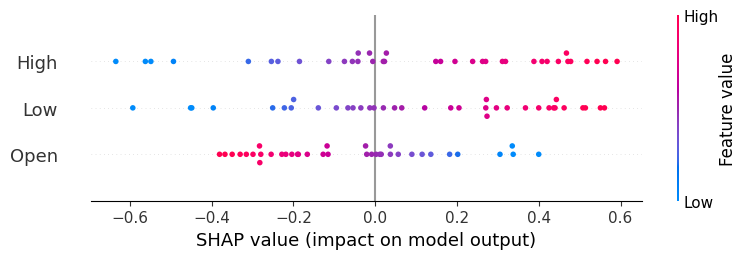

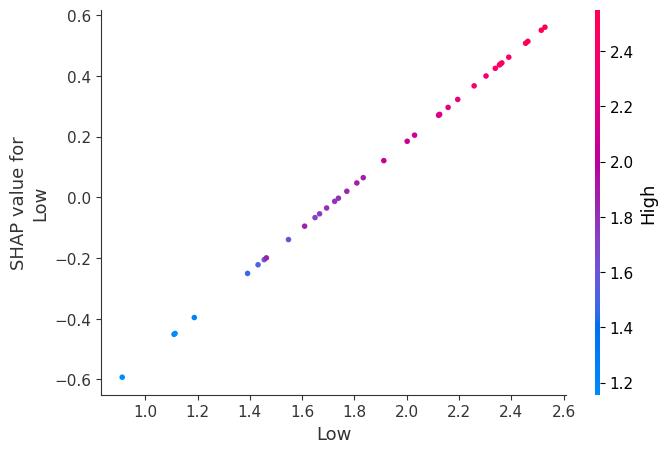

In [64]:
# create a summary plot of the SHAP values

shap.summary_plot(shap_values, X_test)

# create a dependence plot for a specific feature
shap.dependence_plot('Low', shap_values, X_test)

It's great that you've chosen RidgeCV as your best-performing model and fine-tuned the hyperparameter, obtaining an alpha value of 0.01. Now, let's explore feature importance using two methods:

Coefficient Analysis:

High Positive Coefficient: Indicates a positive impact on the target variable.
Open Negative Coefficient: Suggests a negative correlation with the target variable.
This method provides insights into how each feature contributes to the prediction.
SHAP (SHapley Additive exPlanations):

SHAP values quantify the contribution of each feature to the predicted outcome for a specific instance.
Summary Plot: Ranks features based on mean absolute SHAP values across the test set.
High and Low Features: Identified as having the strongest impact on the model's predictions.
Offers a detailed understanding of feature importance and their impact on predictions.
By combining information from coefficient analysis and SHAP values, you gain a comprehensive understanding of the features influencing your RidgeCV model. This insight is valuable for interpretation and potentially guiding further actions or optimizations in your model or dataset.


# **Conclusion**

Your approach to dealing with multicollinearity by exploring different regularization techniques with cross-validation is sound. Identifying RidgeCV as the best-performing model based on Mean Squared Error (MSE) and Adjusted R2 (Adj R2) indicates its effectiveness in handling multicollinearity and providing a reliable prediction.

Moreover, your investigation into feature importance adds valuable insights to the model interpretation. Highlighting that the "High" feature has a significant positive impact on the target variable while "Open" has a negative impact underscores the practicality of the model. These findings provide a clear understanding of which features are influencing the Yes Bank stock closing price predictions and in what direction.

In summary, your systematic approach, model selection, and feature importance analysis contribute to building a robust predictive model for Yes Bank stock closing prices.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***